In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import *
from numpy.random import *
from scipy.stats import *
from scipy.optimize import leastsq
import numpy.random as random

# Determination constants $D_i$ from theory
In this notebook the constants $D_i$ in the strength prediction function are determined from theoretical constants $C_i$ (see section 3.2). 
- 1. A prediction is made and the error is measured 
- 2. A prediction of the measured error is made and compared to the actual measured error 

In [2]:
data = read_csv('Data_MOBETa.csv',sep=';')
soorten = ['Billinga','Tali','Eveuss','Okan','Massaranduba','Greenheart']

random.seed(10)

# Data selection
for i in soorten: 
    nmetKR = len(data.KR[(data.KR>0)&(data.Species==i)])
    a = data.KR[(data.KR==0)&(data.Species==i)]
    remove_n = len(a) - nmetKR
    drop_indices = random.choice(data.index[(data.KR==0)&(data.Species==i)], remove_n, replace=False)
    data = data.drop(drop_indices)

# Definition of strength prediction model
def faKRmod(rho,KR,MOEaKR,D1,D2,D3,D4,D5):
    f = (( rho*MOEaKR*(1-D3*KR) ) / ( D1*rho*(1-D4*KR) + D2*MOEaKR )) + D5
    return f

# Definition of error prediction model
def errormod(rho,KR,MOE,D1,D2,D3,D4,X1,X2,vF,vM):
    error = (X2*vF*sqrt(1-r**2) * (1-D3*KR)*rho*MOE ) / (D1*rho*(1-D4*KR) + D2*MOE)
    return error

In [3]:
## Definition of theoretical constants
C1 = 0.12
C2 = 29.22
C3 = 46.77
C4 = 14.45
C5 = 0.72
C6 = 0.38
C7 = 0.0
D1 = ( (C3-1)*C2 ) / ( C1*(C4-1) )
D2 = (C4-C3) / ( C1*(C4-1) )
D3 = C5
D4 = C6
D5 = C7
print (D1,D2,D3,D4,D5)

828.6241635687733 -20.024783147459733 0.72 0.38 0.0


## 1. A prediction is made and the error is measured

r^2 =  0.29517386905674564


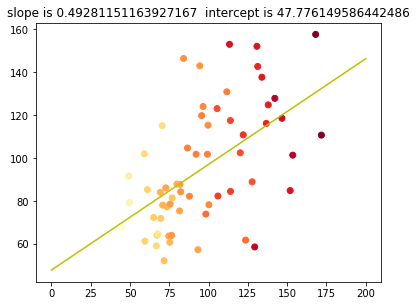

In [4]:
## Prediction on Greenheart data
bgreen = data.alpha[(data.Species=='Greenheart')]
x1green = data.rho12[(data.Species=='Greenheart')]
x2green = data.KR[(data.Species=='Greenheart')]
x3green = data.Edyn12[(data.Species=='Greenheart')]
ygreen = data.fm12[(data.Species=='Greenheart')]

# Relation between predicted and measured values
xgreen = faKRmod(x1green,x2green,x3green,D1,D2,D3,D4,D5)
slopegreen, interceptgreen, r_valuegreen, p_value, std_err = linregress(xgreen,ygreen)
print ("r^2 = ",r_valuegreen**2)
reeks = np.linspace(0,200,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.4,0.9])
ax1.set_title("slope is "+str(slopegreen)+"  intercept is "+str(interceptgreen))
s1 = ax1.scatter(xgreen,ygreen,c=x3green,cmap='YlOrRd',edgecolor='face')
s2 = ax1.plot(reeks,reeks*slopegreen+interceptgreen,'y')

plt.show()

In [6]:
## Totaal
C1 = 0.1
C2 = 25
C3 = 30
C4 = 14
C5 = 1.05
C6 = 0.4
C7 = 5.
D1 = ( (C3-1)*C2 ) / ( C1*(C4-1) )
D2 = (C4-C3) / ( C1*(C4-1) )
D3 = C5
D4 = C6
D5 = C7
print (D1,D2,D3,D4,D5)

557.6923076923076 -12.307692307692307 1.05 0.4 5.0


r^2 =  0.611805851230558


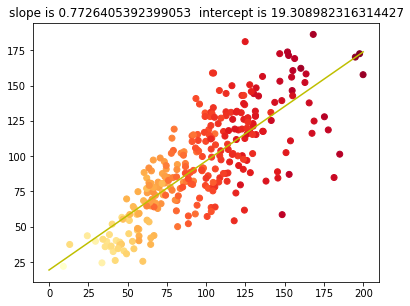

In [7]:
## Prediction of strength for all data
btot = data.alpha
x1tot = data.rho12
x2tot = data.KR
x3tot = data.Edyn12
ytot = data.fm12

xtot = faKRmod(x1tot,x2tot,x3tot,D1,D2,D3,D4,D5)
drop_indices = data.index[xtot>200.]
data = data.drop(drop_indices)

btot = data.alpha
x1tot = data.rho12
x2tot = data.KR
x3tot = data.Edyn12
ytot = data.fm12

xtot = faKRmod(x1tot,x2tot,x3tot,D1,D2,D3,D4,D5)

slopetot, intercepttot, r_valuetot, p_value, std_err = linregress(xtot,ytot)
print ("r^2 = ",r_valuetot**2)
reeks = np.linspace(0,200,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.4,0.9])
ax1.set_title("slope is "+str(slopetot)+"  intercept is "+str(intercepttot))
s1 = ax1.scatter(xtot,ytot,c=x3tot,cmap='YlOrRd',edgecolor='face')
s2 = ax1.plot(reeks,reeks*slopetot+intercepttot,'y')

plt.show()

6.073618763476487e-17 -6.817159518829742e-16
n =  282
r^2 =  0.611805851230558
r^2 =  0.29517386905674564


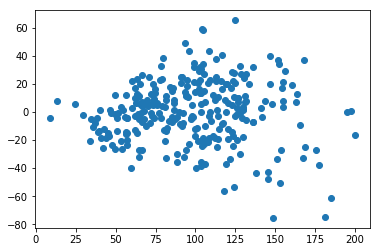

In [11]:
# Calculation of measured error between predicted and measured strength
error = ytot - (slopetot*xtot+intercepttot)
plt.scatter(xtot,error)
slopeerr,intercepterr,rerr,perr,stderrerr = linregress(xtot,error)
print (slopeerr,intercepterr)

print ("n = ",len(data.rho12))
print ("r^2 = ",r_valuetot**2)
print ("r^2 = ",r_valuegreen**2)

# savetxt('errDuitC',error)

Text(-20,-80,'$\\,y\\,=\\,0$')

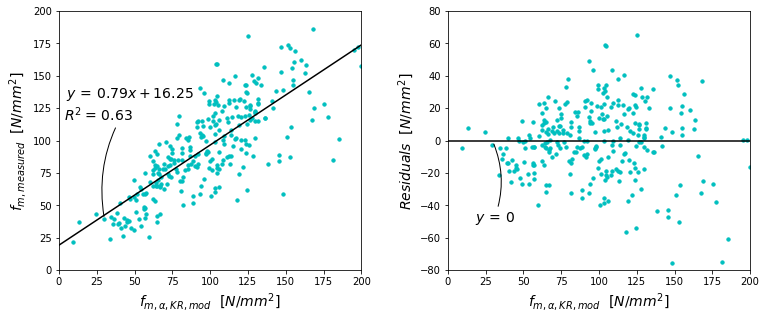

In [14]:
# Nice graph of prediction and prediction error
reeks = np.linspace(0,350,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.35,0.9])
ax1.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$f_{m,measured}$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(14)
ax1.yaxis.label.set_fontsize(14)
ax1.set_xlim(0,200)
ax1.set_ylim(0,200)
s1 = ax1.scatter(xtot,ytot,color='c',edgecolor='face',s=11)
s2 = ax1.plot(reeks,reeks*slopetot+intercepttot,'k')
annotation_string = r"""$\,y\,=\,0.79x+16.25$
$R^2=\,0.63$"""
plt.annotate(annotation_string,
             xy=(30,40), xycoords='data',
             xytext=(-40,100), textcoords='offset points', fontsize=14,
             arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.2"))

ax2 = fig.add_axes([0.5,0.05,0.35,0.9])
ax2.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax2.xaxis.label.set_fontsize(14)
ax2.set_ylabel(r'$Residuals$  $[N/mm^2]$')
ax2.yaxis.label.set_fontsize(14)
ax2.set_xlim(0,200)
ax2.set_ylim(-80,80)
s3 = ax2.scatter(xtot,error,color='c',edgecolor='face',s=11)
s4 = ax2.plot(reeks,reeks*slopeerr+intercepterr,'k')
annotation_string = r"""$\,y\,=\,0$"""
plt.annotate(annotation_string,
             xy=(30,-1), xycoords='data',
             xytext=(-20,-80), textcoords='offset points', fontsize=14,
             arrowprops=dict(arrowstyle="-", connectionstyle="arc3,rad=.2"))
# plt.savefig('DfromCregress'+'.eps', bbox_inches='tight')

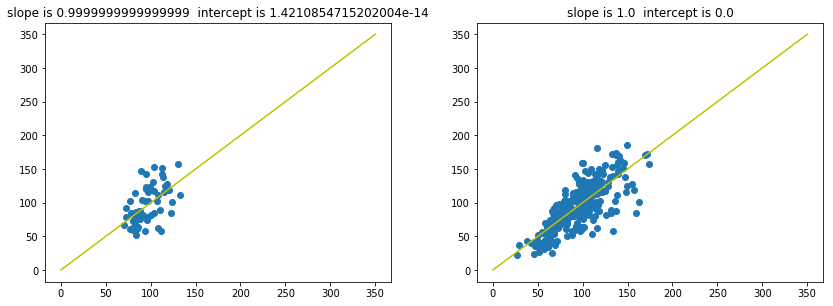

In [20]:
fig = plt.figure(figsize=(12,4))

### adjustment of Greenheart to the line y=x
xadj = slopegreen*xgreen+interceptgreen
slopeadj, interceptadj, r_valueadj, p_valueadj, std_erradj = linregress(xadj,ygreen)
ax1 = fig.add_axes([0.05,0.05,0.4,0.9])
ax1.set_title("slope is "+str(slopeadj)+"  intercept is "+str(interceptadj))
s1 = ax1.scatter(xadj,ygreen)
s2 = ax1.plot(reeks,reeks*slopeadj+interceptadj,'y')

### adjustment of total to the line y=x
xadj = slopetot*xtot+intercepttot
slopeadj, interceptadj, r_valueadj, p_valueadj, std_erradj = linregress(xadj,ytot)
ax2 = fig.add_axes([0.55,0.05,0.4,0.9])
ax2.set_title("slope is "+str(slopeadj)+"  intercept is "+str(interceptadj))
s3 = ax2.scatter(xadj,ytot)
s4 = ax2.plot(reeks,reeks*slopeadj+interceptadj,'y')

## 2. A prediction of the measured error is made and compared to the actual measured error

In [21]:
# Kruskall wallis test for variances: inconclusive
btot = data.alpha
x1tot = data.rho12
x2tot = data.KR
x3tot = data.Edyn12
ytot = data.fm12

# for i in range(len(X1)):
#     while (X1[i]<-2) | (X1[i]>2):
#         X1[i] = np.random.standard_normal(1)
# for i in range(len(X2)):
#     while (X2[i]<-2) | (X2[i]>2):
#         X2[i] = np.random.standard_normal(1)
# plt.scatter(xtot,errorpred,color='y')
# plt.scatter(xtot,error,color='g')    

vF = 0.39
vM = 0.24
r = 0.87

Hstatistic = []
pvalue = []
for i in range(10000):
    X1=np.random.standard_normal(len(x1tot))
    X2=np.random.standard_normal(len(x1tot))
    errorpred = errormod(x1tot,x2tot,x3tot,D1,D2,D3,D4,X1,X2,vF,vM)
    Hstatistic.append(kruskal(error,errorpred)[0])
    pvalue.append(kruskal(error,errorpred)[1])
    
print (mean(Hstatistic))
print (mean(pvalue))

0.4946413018611935
0.6103497738780581


H =  2.058133326923553    p =  0.1513955331873141


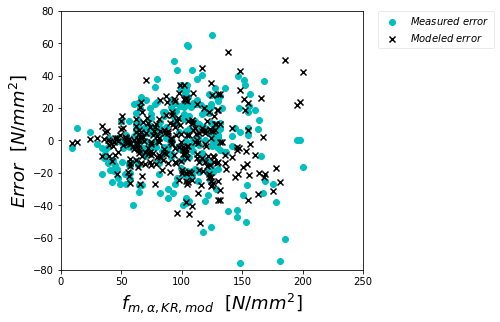

In [22]:
# Nice graph for in report of the measured error of the predicted and measured values and of the predicted error
reeks = np.linspace(0,250,100)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_axes([0.05,0.05,0.35,0.9])
ax1.set_xlabel(r'$f_{m,\alpha,KR,mod}$  $[N/mm^2]$')
ax1.set_ylabel(r'$Error$  $[N/mm^2]$')
ax1.xaxis.label.set_fontsize(18)
ax1.yaxis.label.set_fontsize(18)
ax1.set_xlim(0,250)
ax1.set_ylim(-80,80)
s1 = ax1.scatter(xtot,error,color='c',edgecolor='face',label='$Measured$ $error$')
s2 = ax1.scatter(xtot,errorpred,color='k',marker='x',label='$Modeled$ $error$')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
lgd.get_frame().set_linewidth(0.5)

H,p = kruskal(error,errorpred)
print ("H = ",H,"   p = ",p)

# plt.savefig('errDuitC'+'.eps', bbox_inches='tight')